In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [369]:
def parse_to_standard(path: str):
    common_df = pd.read_csv(path)
    cpu_df = pd.DataFrame(common_df["CPU usage [%]"])
    cpu_df.columns = ["CPU Usage"]
    cpu_df["Time"] = cpu_df.index
    
    mem_df = pd.DataFrame(common_df["Used [B]"].apply(lambda x: int(x.replace(",", ""))/1e6))
    mem_df.columns = ["Used"]
    mem_df["Time"] = mem_df.index
    
    thread_df = pd.DataFrame(common_df["Live"])
    thread_df.columns = ["Live threads"]
    thread_df["Time"] = thread_df.index

    return (cpu_df, mem_df, thread_df)


In [370]:
rsocket_db_mem = pd.read_csv("../Rsocket/DB/mem.csv")
rsocket_db_thread = pd.read_csv("../Rsocket/DB/thread.csv")
rsocket_db_cpu = pd.read_csv("../Rsocket/DB/cpu.csv")
rsocket_db_throughput = pd.read_csv("../Rsocket/DB/throughput.csv")

grpc_db_mem = pd.read_csv("../gRPC/DB/mem.csv")
grpc_db_thread = pd.read_csv("../gRPC/DB/thread.csv")
grpc_db_cpu = pd.read_csv("../gRPC/DB/cpu.csv")
grpc_db_throughput = pd.read_csv("../gRPC/DB/throughput.csv")

db_thread_stats = ["10 Threads", "20 Threads", "50 Threads", "100 Threads"]

rsocket_sized_mem = pd.read_csv("../Rsocket/Sized/mem.csv")
rsocket_sized_thread = pd.read_csv("../Rsocket/Sized/thread.csv")
rsocket_sized_cpu = pd.read_csv("../Rsocket/Sized/cpu.csv")
rsocket_sized_throughput = pd.read_csv("../Rsocket/Sized/throughput.csv")

grpc_sized_mem = pd.read_csv("../gRPC/Sized/mem.csv")
grpc_sized_thread = pd.read_csv("../gRPC/Sized/thread.csv")
grpc_sized_cpu = pd.read_csv("../gRPC/Sized/cpu.csv")
grpc_sized_throughput = pd.read_csv("../gRPC/Sized/throughput.csv")

rsocket_large_sized_mem = pd.read_csv("../Rsocket/LargeSized/mem.csv")
rsocket_large_sized_thread = pd.read_csv("../Rsocket/LargeSized/thread.csv")
rsocket_large_sized_cpu = pd.read_csv("../Rsocket/LargeSized/cpu.csv")
rsocket_large_sized_throughput = pd.read_csv("../Rsocket/LargeSized/throughput.csv")

grpc_large_sized_mem = pd.read_csv("../gRPC/LargeSized/mem.csv")
grpc_large_sized_thread = pd.read_csv("../gRPC/LargeSized/thread.csv")
grpc_large_sized_cpu = pd.read_csv("../gRPC/LargeSized/cpu.csv")
grpc_large_sized_throughput = pd.read_csv("../gRPC/LargeSized/throughput.csv")

rsocket_db_clients_mem = pd.read_csv("../Rsocket/DbClientStreaming/mem.csv")
rsocket_db_clients_thread = pd.read_csv("../Rsocket/DbClientStreaming/thread.csv")
rsocket_db_clients_cpu = pd.read_csv("../Rsocket/DbClientStreaming/cpu.csv")
rsocket_db_clients_throughput = pd.read_csv("../Rsocket/DbClientStreaming/throughput.csv")

grpc_db_clients_mem = pd.read_csv("../gRPC/DbClientStreaming/mem.csv")
grpc_db_clients_thread = pd.read_csv("../gRPC/DbClientStreaming/thread.csv")
grpc_db_clients_cpu = pd.read_csv("../gRPC/DbClientStreaming/cpu.csv")
grpc_db_clients_throughput = pd.read_csv("../gRPC/DbClientStreaming/throughput.csv")

rsocket_db_reqres_mem = pd.read_csv("../Rsocket/DBReqRes/mem.csv")
rsocket_db_reqres_thread = pd.read_csv("../Rsocket/DBReqRes/thread.csv")
rsocket_db_reqres_cpu = pd.read_csv("../Rsocket/DBReqRes/cpu.csv")
rsocket_db_reqres_throughput = pd.read_csv("../Rsocket/DBReqRes/throughput.csv")

grpc_db_reqres_mem = pd.read_csv("../gRPC/DBReqRes/mem.csv")
grpc_db_reqres_thread = pd.read_csv("../gRPC/DBReqRes/thread.csv")
grpc_db_reqres_cpu = pd.read_csv("../gRPC/DBReqRes/cpu.csv")
grpc_db_reqres_throughput = pd.read_csv("../gRPC/DBReqRes/throughput.csv")


In [371]:
def scale_values(values: list, new_min: float, new_max: float):
    values = np.array(values)

    min_val = np.min(values)
    max_val = np.max(values)

    factor1 = new_min / min_val
    factor2 = new_max / max_val

    return (factor1 + factor2) / 2

In [372]:
def process_time_values(df: pd.DataFrame, time_column: str = "Time"):
    time_values = df[time_column] - df[time_column].min()
    time_values = time_values * 1000000
    time_values = time_values.apply(lambda x: int(x))
    return time_values

In [373]:
def plot_through_put_line(
    time_values,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    y_max=None,
    y_min=None,
    labels=None,
):
    font = {'family': 'Proxima Nova', 'size': 12}
    plt.rc('font', **font)
    x_max = max(time_values)
    x_min = min(time_values)

    split = np.linspace(x_min, x_max, 5)
    ranges = list(zip(split[0:-1], split[1:]))
    x_pos_throughput = [range[0] + (range[1] - range[0]) / 2 for range in ranges]

    rsocket_throughput_values = rsocket_throughput["Score"]
    grpc_throughput_values = grpc_throughput["Score"]

    factor = 1

    if y_max is not None and x_max is not None:
        factor = scale_values(rsocket_throughput_values, 1.2 * y_min, 0.7 * y_max)

    plt.plot(
        x_pos_throughput,
        list(map(lambda x: factor * x, rsocket_throughput_values)),
        color=[219/255,50/255,143/255],
        linestyle="--",
        marker = "o",
        label="RSocket Troughput",
    )
    plt.plot(
        x_pos_throughput,
        list(map(lambda x: factor * x, grpc_throughput_values)),
        color=[100/255,189/255,189/255],
        linestyle="--",
        marker='o',
        label="gRPC Throughput",
    )

    if labels == None:
        plt.xticks(x_pos_throughput)
    else:
        plt.xticks(x_pos_throughput, labels)

In [374]:
def draw_throughput_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    thread_stats,
    title: str = "Thoughput",
    save_loc="./graphs",
):
    font = {"family": "Proxima Nova", "size": 12}
    plt.rc("font", **font)
    rsocket_throughput_values = rsocket_df["Score"]
    grpc_throughput_values = grpc_df["Score"]

    width = 0.25
    plt.barh(
        [i - width / 2 for i in range(len(rsocket_throughput_values))],
        rsocket_throughput_values,
        color=[219 / 255, 50 / 255, 143 / 255],
        label="RSocket",
        height=width,
    )
    plt.barh(
        [i + width / 2 for i in range(len(grpc_throughput_values))],
        grpc_throughput_values,
        color=[100 / 255, 189 / 255, 189 / 255],
        label="gRPC",
        height=width,
    )

    plt.yticks([i for i in range(len(rsocket_throughput_values))], thread_stats)
    plt.ylabel("Num of Threads")
    plt.xlabel("Throughput")
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.savefig(save_loc)
    plt.show()

In [375]:
def draw_cpu_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    throughput_labels=None,
    title="CPU Usage chart",
    save_loc = "./graphs"
):
    font = {'family': 'Proxima Nova', 'size': 12}
    plt.rc('font', **font)
    rsocket_time_values = process_time_values(rsocket_df)

    rsocket_cpu_coordinates_x = list(rsocket_time_values)
    rsocket_cpu_coordinates_y = list(rsocket_df["CPU Usage"])
    rsocket_cpu_coordinates_y_s = np.convolve(
        rsocket_cpu_coordinates_y, np.ones(3) / 3, mode="same"
    )

    plt.plot(
        rsocket_cpu_coordinates_x,
        rsocket_cpu_coordinates_y,
        color=[219/255,50/255,143/255],
        label="RSocket",
        alpha=0.8,
    )

    grpc_time_values = process_time_values(grpc_df)

    grpc_cpu_coordinates_x = list(grpc_time_values)
    grpc_cpu_coordinates_y = list(grpc_df["CPU Usage"])
    grpc_cpu_coordinates_y_s = np.convolve(
        grpc_cpu_coordinates_y, np.ones(3) / 3, mode="same"
    )

    plt.plot(
        grpc_cpu_coordinates_x,
        grpc_cpu_coordinates_y,
        color=[100/255,189/255,189/255],
        label="gRPC",
        alpha=0.8,
    )

    if grpc_throughput is not None and rsocket_throughput is not None:
        plot_through_put_line(
            grpc_time_values,
            rsocket_throughput,
            grpc_throughput,
            max(grpc_cpu_coordinates_y),
            min(grpc_cpu_coordinates_y),
            labels=throughput_labels,
        )

    plt.title(title)
    plt.legend(loc='upper left')
    plt.xlabel("Time")
    plt.ylabel("CPU Usage")
    plt.tight_layout()
    plt.savefig(save_loc)
    plt.show()

In [376]:
def draw_thread_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    throughput_labels=None,
    title = "Live Thread Chart",
    save_loc = "./graphs"
):
    font = {'family': 'Proxima Nova', 'size': 12}
    plt.rc('font', **font)
    rsocket_time_values = process_time_values(rsocket_df)

    rsocket_thread_coordinates_x = list(rsocket_time_values)
    rsocket_thread_coordinates_y = list(rsocket_df["Live threads"])
    rsocket_thread_coordinates_y_s = np.convolve(
        rsocket_thread_coordinates_y, np.ones(3) / 3, mode="same"
    )

    grpc_time_values = process_time_values(grpc_df)

    grpc_thread_coordinates_x = list(grpc_time_values)
    grpc_thread_coordinates_y = list(grpc_df["Live threads"])
    grpc_thread_coordinates_y_s = np.convolve(
        grpc_thread_coordinates_y, np.ones(3) / 3, mode="same"
    )

    plt.plot(
        grpc_thread_coordinates_x,
        grpc_thread_coordinates_y,
        color=[100/255,189/255,189/255],
        label="gRPC",
        alpha=0.8,
    )
    plt.plot(
        rsocket_thread_coordinates_x,
        rsocket_thread_coordinates_y,
        color=[219/255,50/255,143/255],
        label="RSocket",
        alpha=0.8,
    )

    if grpc_throughput is not None and rsocket_throughput is not None:
        plot_through_put_line(
            grpc_time_values,
            rsocket_throughput,
            grpc_throughput,
            max(grpc_thread_coordinates_y),
            min(grpc_thread_coordinates_y),
            labels=throughput_labels,
        )

    plt.legend(loc='upper left')
    plt.xlabel("Time")
    plt.ylabel("Live threads")
    plt.title(title)
    plt.tight_layout()

    plt.savefig(save_loc)
    plt.show()

In [377]:
def draw_mem_chart(
    rsocket_df: pd.DataFrame,
    grpc_df: pd.DataFrame,
    window: int = 9,
    rsocket_throughput: pd.DataFrame = None,
    grpc_throughput: pd.DataFrame = None,
    throughput_labels=None,
    title="Memory Usage Chart",
    save_loc = "./graphs"
):
    font = {'family': 'Proxima Nova', 'size': 12}
    plt.rc('font', **font)
    rsocket_time_values = process_time_values(rsocket_df)

    rsocket_mem_coordinates_x = list(rsocket_time_values)
    rsocket_mem_coordinates_y = list(rsocket_df["Used"])
    rsocket_mem_coordinates_y_s = np.convolve(
        rsocket_mem_coordinates_y, np.ones(window) / window, mode="same"
    )

    grpc_time_values = process_time_values(grpc_df)

    grpc_mem_coordinates_x = list(grpc_time_values)
    grpc_mem_coordinates_y = list(grpc_df["Used"])
    grpc_mem_coordinates_y_s = np.convolve(
        grpc_mem_coordinates_y, np.ones(window) / window, mode="same"
    )

    plt.plot(
        grpc_mem_coordinates_x,
        grpc_mem_coordinates_y_s,
        color=[100/255,189/255,189/255],
        label="gRPC",
        alpha=0.8,
    )
    plt.plot(
        rsocket_mem_coordinates_x,
        rsocket_mem_coordinates_y_s,
        color=[219/255,50/255,143/255],
        label="RSocket",
        alpha=0.8,
    )

    if grpc_throughput is not None and rsocket_throughput is not None:
        plot_through_put_line(
            grpc_time_values,
            rsocket_throughput,
            grpc_throughput,
            max(grpc_mem_coordinates_y),
            min(grpc_mem_coordinates_y),
            labels=throughput_labels,
        )

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.xlabel("Time")
    plt.ylabel("Used Memory")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(save_loc)
    plt.show()

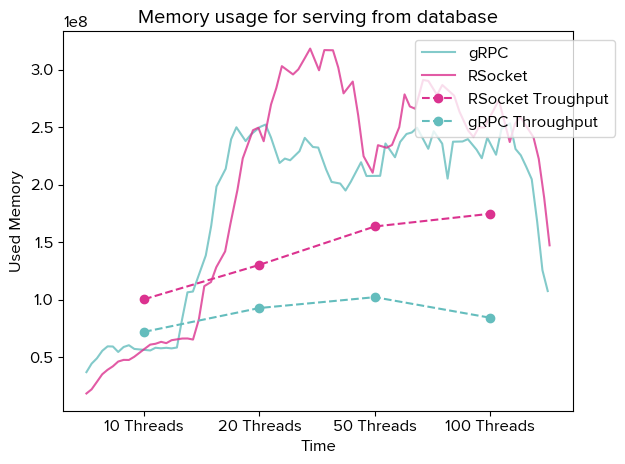

In [378]:
draw_mem_chart(
    rsocket_db_mem,
    grpc_db_mem,
    grpc_throughput=grpc_db_throughput,
    rsocket_throughput=rsocket_db_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Memory usage for serving from database",
    save_loc="../graphs/db_req_stream_mem.png"
)

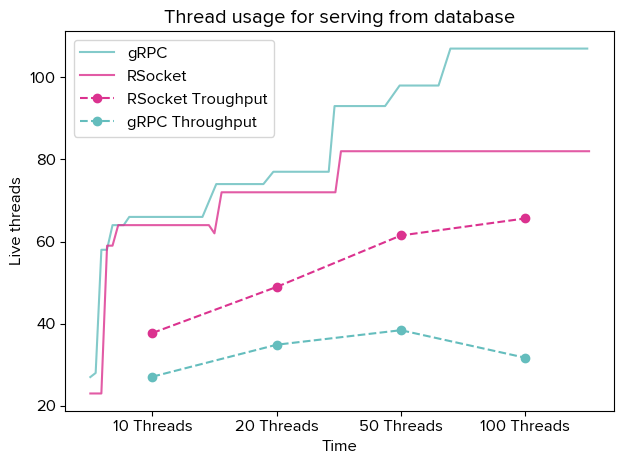

In [379]:
draw_thread_chart(
    rsocket_db_thread,
    grpc_db_thread,
    grpc_throughput=grpc_db_throughput,
    rsocket_throughput=rsocket_db_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Thread usage for serving from database",
    save_loc="../graphs/db_req_stream_thread.png"

)

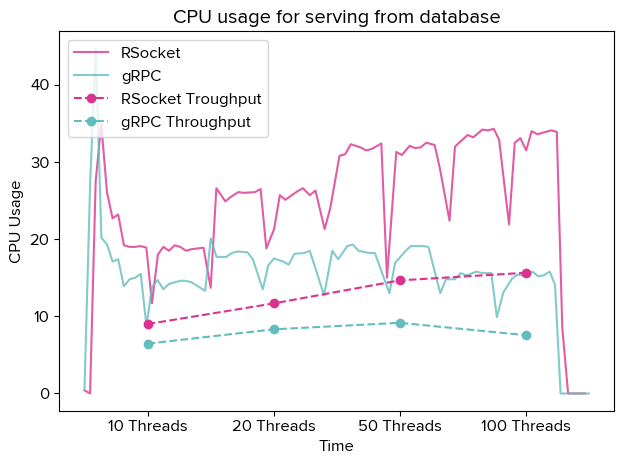

In [380]:
draw_cpu_chart(
    rsocket_db_cpu,
    grpc_db_cpu,
    grpc_throughput=grpc_db_throughput,
    rsocket_throughput=rsocket_db_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="CPU usage for serving from database",
    save_loc="../graphs/db_req_stream_cpu.png"
)

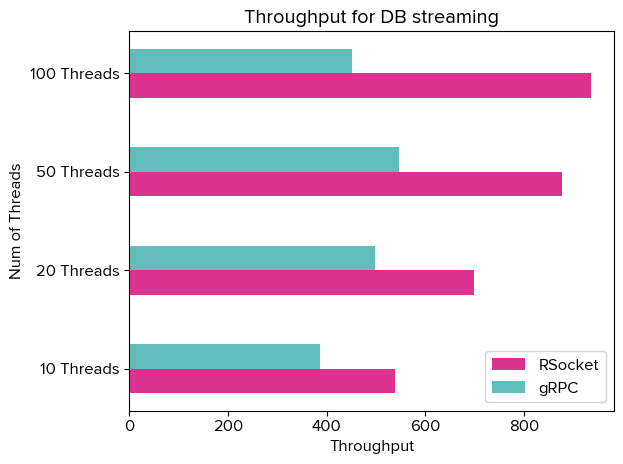

In [381]:
draw_throughput_chart(
    rsocket_db_throughput,
    grpc_db_throughput,
    db_thread_stats,
    title="Throughput for DB streaming",
    save_loc="../graphs/db_req_stream_throughput.png",
)

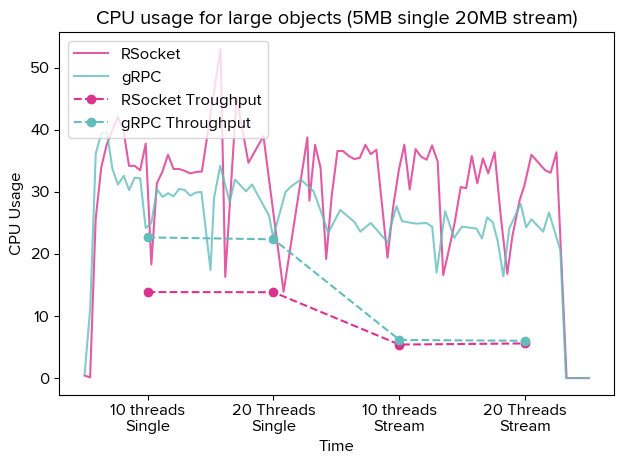

In [382]:
draw_cpu_chart(
    rsocket_sized_cpu,
    grpc_sized_cpu,
    rsocket_sized_throughput,
    grpc_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="CPU usage for large objects (5MB single 20MB stream)",
    save_loc="../graphs/sized_cpu.png"
)

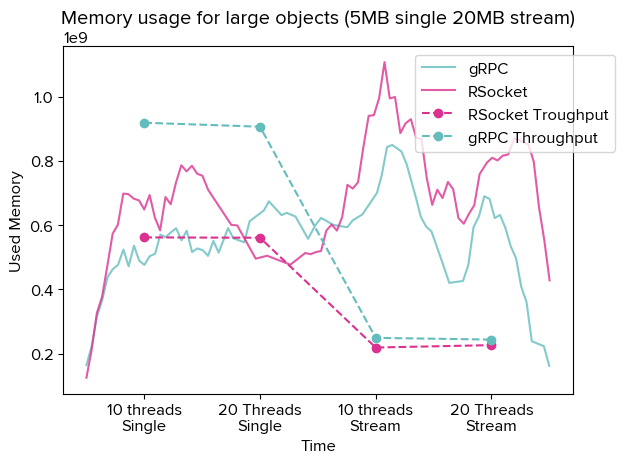

In [383]:
draw_mem_chart(
    rsocket_sized_mem,
    grpc_sized_mem,
    rsocket_throughput= rsocket_sized_throughput,
    grpc_throughput= grpc_sized_throughput,
    throughput_labels=[
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Memory usage for large objects (5MB single 20MB stream)",
    save_loc="../graphs/sized_mem.png"
)

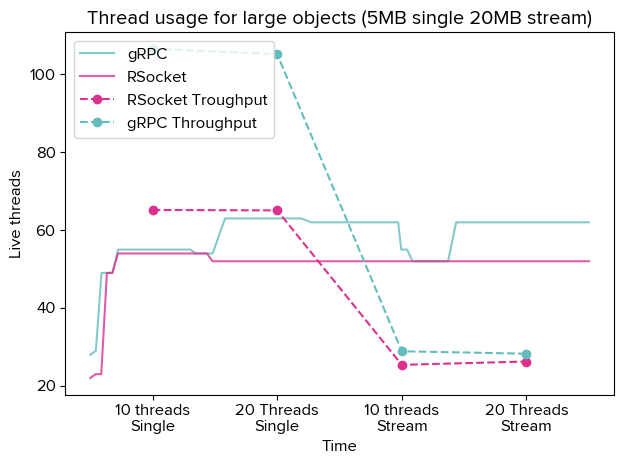

In [384]:
draw_thread_chart(
    rsocket_sized_thread,
    grpc_sized_thread,
    rsocket_sized_throughput,
    grpc_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Thread usage for large objects (5MB single 20MB stream)",
    save_loc="../graphs/sized_thread.png"
)

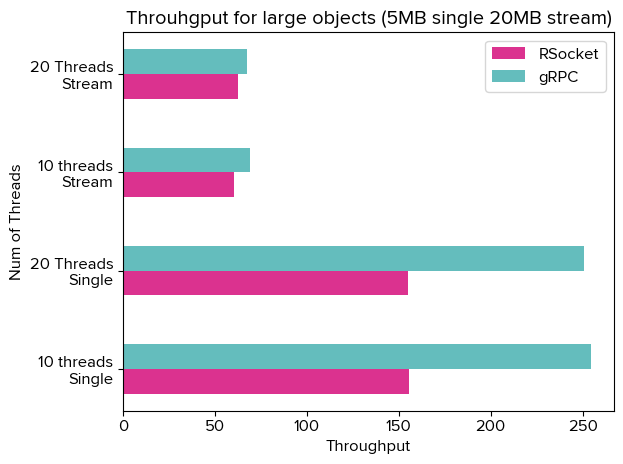

In [385]:
draw_throughput_chart(
    rsocket_sized_throughput,
    grpc_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Throuhgput for large objects (5MB single 20MB stream)",
    save_loc="../graphs/sized_throughput.png"
)

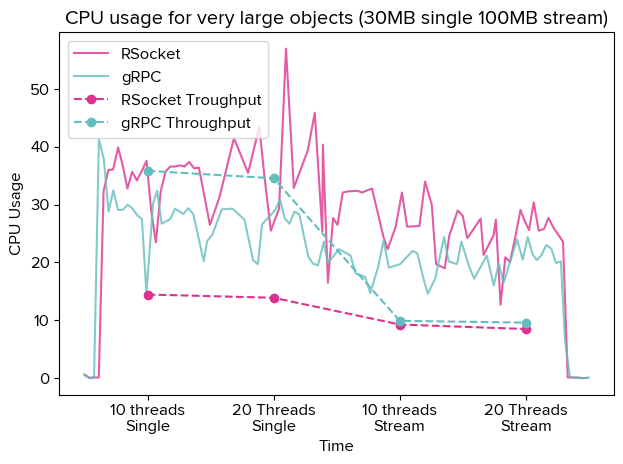

In [386]:
draw_cpu_chart(
    rsocket_large_sized_cpu,
    grpc_large_sized_cpu,
    rsocket_large_sized_throughput,
    grpc_large_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="CPU usage for very large objects (30MB single 100MB stream)",
    save_loc="../graphs/very_large_cpu.png"
)

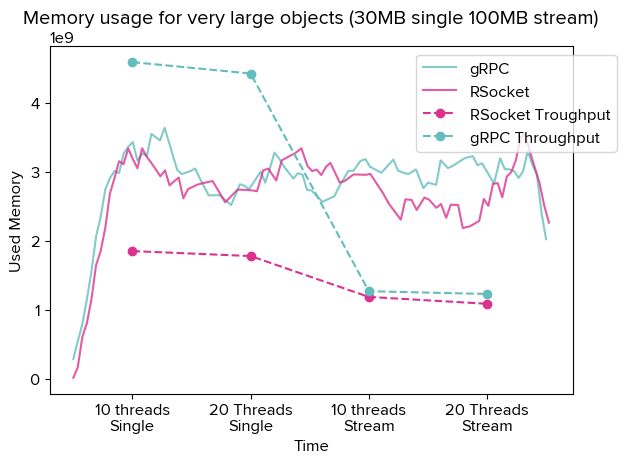

In [387]:
draw_mem_chart(
    rsocket_large_sized_mem,
    grpc_large_sized_mem,
    rsocket_throughput= rsocket_large_sized_throughput,
    grpc_throughput= grpc_large_sized_throughput,
    throughput_labels=[
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Memory usage for very large objects (30MB single 100MB stream)",
    save_loc="../graphs/very_large_mem.png"
)

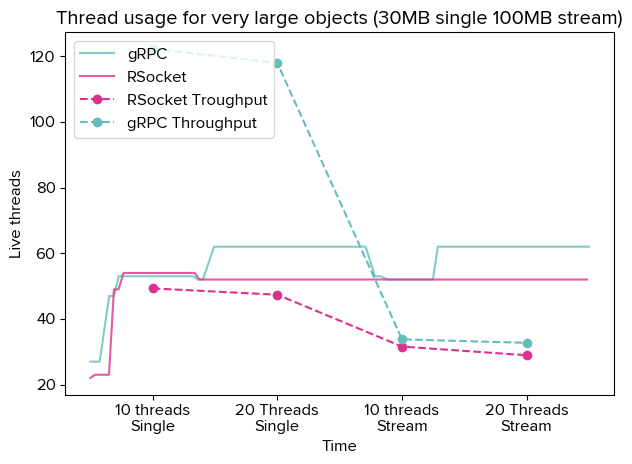

In [388]:
draw_thread_chart(
    rsocket_large_sized_thread,
    grpc_large_sized_thread,
    rsocket_large_sized_throughput,
    grpc_large_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Thread usage for very large objects (30MB single 100MB stream)",
    save_loc="../graphs/very_large_thread.png"
)

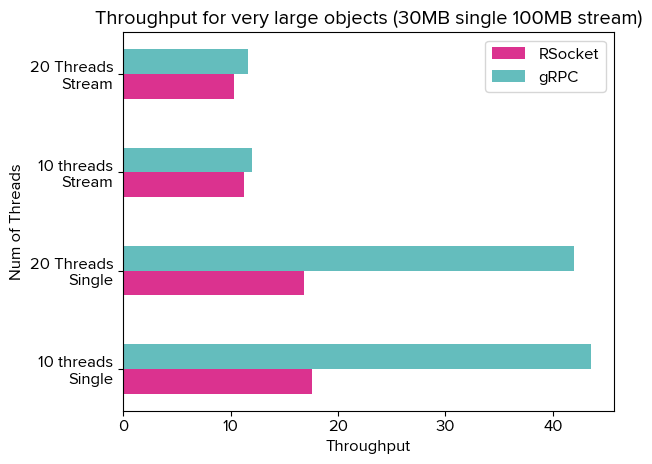

In [389]:
draw_throughput_chart(
    rsocket_large_sized_throughput,
    grpc_large_sized_throughput,
    [
        "10 threads\nSingle",
        "20 Threads\nSingle",
        "10 threads\nStream",
        "20 Threads\nStream",
    ],
    title="Throughput for very large objects (30MB single 100MB stream)",
    save_loc="../graphs/very_large_throughput.png"
    
)

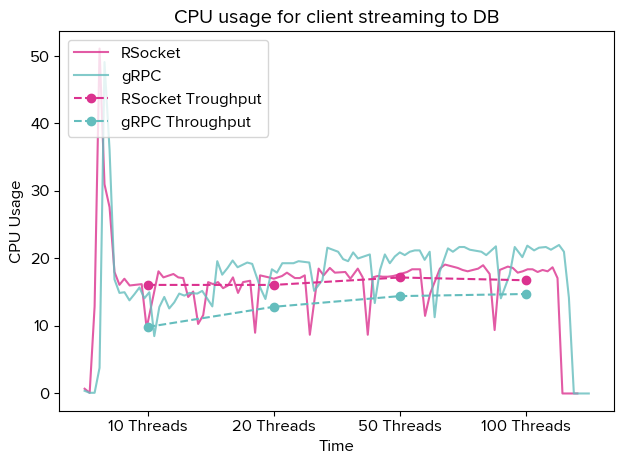

In [390]:
draw_cpu_chart(
    rsocket_db_clients_cpu,
    grpc_db_clients_cpu,
    rsocket_db_clients_throughput,
    grpc_db_clients_throughput,
    ["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="CPU usage for client streaming to DB",
    save_loc="../graphs/db_client_streaming_cpu.png"
)

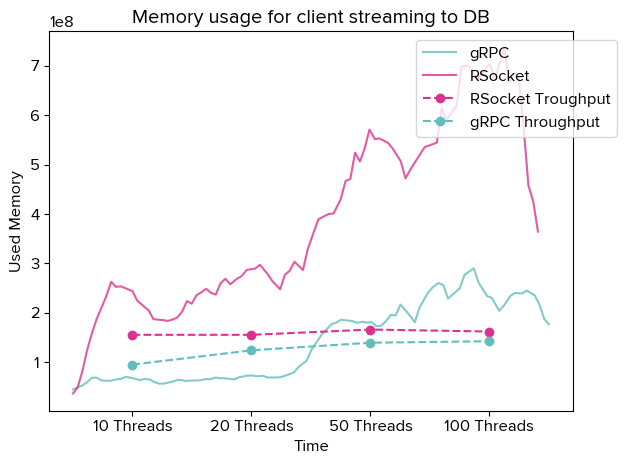

In [391]:
draw_mem_chart(
    rsocket_db_clients_mem,
    grpc_db_clients_mem,
    rsocket_throughput= rsocket_db_clients_throughput,
    grpc_throughput= grpc_db_clients_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Memory usage for client streaming to DB",
     save_loc="../graphs/db_client_streaming_mem.png"
)

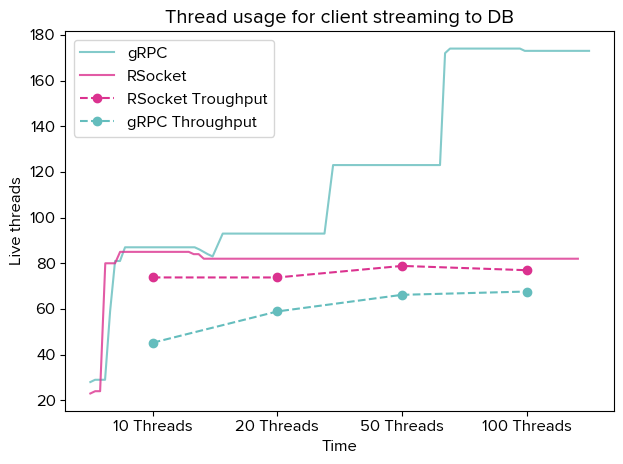

In [392]:
draw_thread_chart(
    rsocket_db_clients_thread,
    grpc_db_clients_thread,
    rsocket_db_clients_throughput,
    grpc_db_clients_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Thread usage for client streaming to DB",
    save_loc="../graphs/db_client_streaming_thread.png"
)

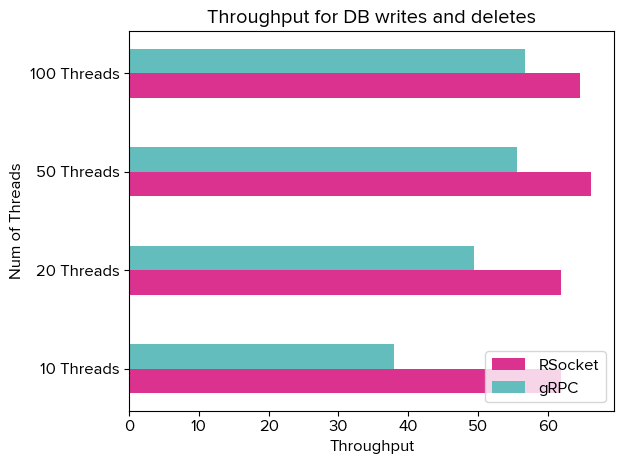

In [393]:
draw_throughput_chart(
    rsocket_db_clients_throughput,
    grpc_db_clients_throughput,
    thread_stats=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Throughput for DB writes and deletes",
    save_loc="../graphs/db_client_streaming_throughput.png"
)

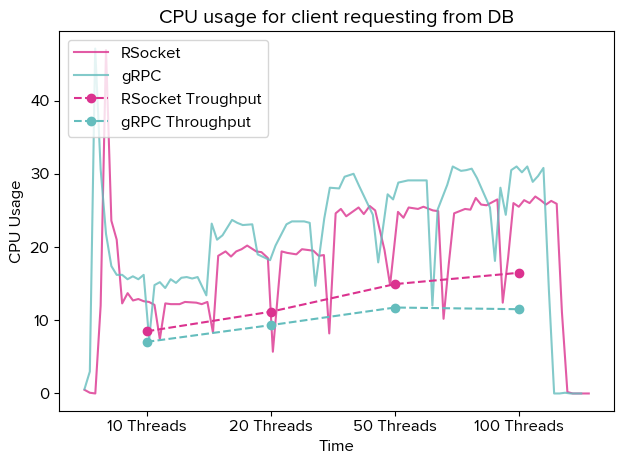

<Figure size 640x480 with 0 Axes>

In [394]:
draw_cpu_chart(
    rsocket_db_reqres_cpu,
    grpc_db_reqres_cpu,
    rsocket_db_reqres_throughput,
    grpc_db_reqres_throughput,
    ["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="CPU usage for client requesting from DB",
     save_loc="../graphs/db_req_res_cpu.png"
)
plt.savefig("../graphs/db_req_res_cpu")


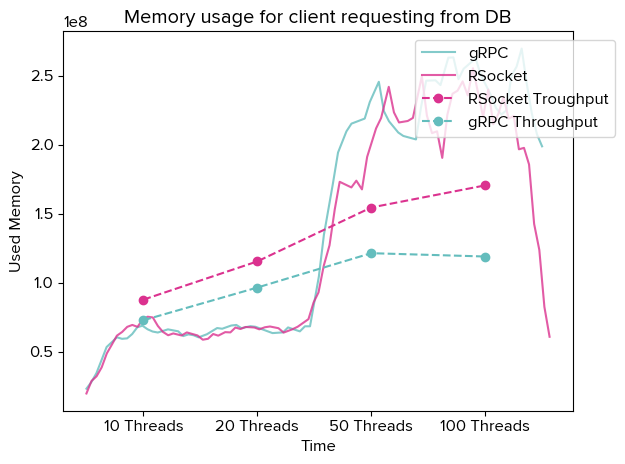

In [395]:
draw_mem_chart(
    rsocket_db_reqres_mem,
    grpc_db_reqres_mem,
    rsocket_throughput= rsocket_db_reqres_throughput,
    grpc_throughput= grpc_db_reqres_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Memory usage for client requesting from DB",
    save_loc="../graphs/db_req_res_mem.png"
)

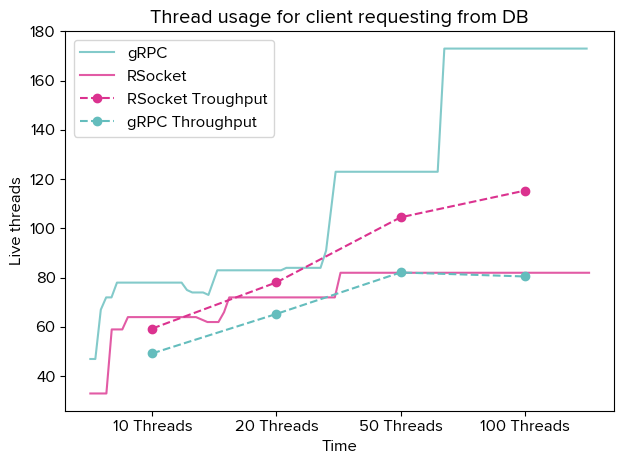

In [396]:
draw_thread_chart(
    rsocket_db_reqres_thread,
    grpc_db_reqres_thread,
    rsocket_db_reqres_throughput,
    grpc_db_reqres_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Thread usage for client requesting from DB",
    save_loc="../graphs/db_req_res_thread.png"
)



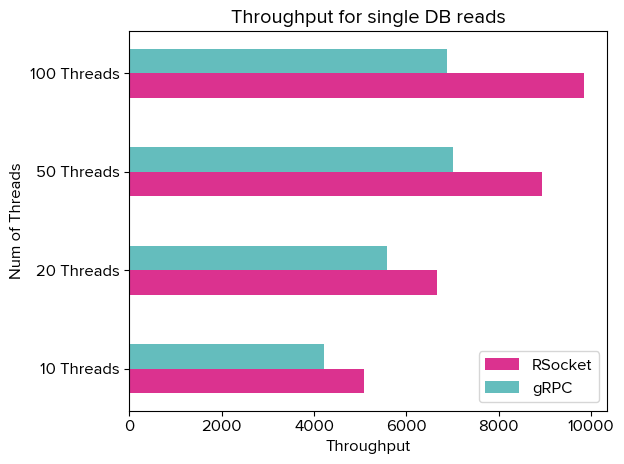

In [397]:
draw_throughput_chart(
    rsocket_db_reqres_throughput,
    grpc_db_reqres_throughput,
    thread_stats=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Throughput for single DB reads",
    save_loc="../graphs/db_req_res_throughput"
)


In [398]:
rsocket_req_res_cpu, rsocket_req_res_mem, rsocket_req_res_thread = parse_to_standard("../NewRs/ReqRes/data.csv")
rsocket_req_res_throughput = pd.read_csv("../NewRs/ReqRes/throughput.csv")
rsocket_req_stream_cpu, rsocket_req_stream_mem, rsocket_req_stream_thread = parse_to_standard("../NewRs/ReqStream/data.csv")
rsocket_req_stream_throughput = pd.read_csv("../NewRs/ReqStream/throughput.csv")
rsocket_stream_res_cpu, rsocket_stream_res_mem, rsocket_stream_res_thread = parse_to_standard("../NewRs/StreamRes/data.csv")
rsocket_stream_res_throughput = pd.read_csv("../NewRs/StreamRes/throughput.csv")
rsocket_channel_cpu, rsocket_channel_mem, rsocket_channel_thread = parse_to_standard("../NewRs/Channel/data.csv")
rsocket_channel_throughput = pd.read_csv("../NewRs/Channel/throughput.csv")

grpc_req_res_cpu, grpc_req_res_mem, grpc_req_res_thread = parse_to_standard("../NewGrpc/ReqRes/data.csv")
grpc_req_res_throughput = pd.read_csv("../NewGrpc/ReqRes/throughput.csv")
grpc_req_stream_cpu, grpc_req_stream_mem, grpc_req_stream_thread = parse_to_standard("../NewGrpc/ReqStream/data.csv")
grpc_req_stream_throughput = pd.read_csv("../NewGrpc/ReqStream/throughput.csv")
grpc_stream_res_cpu, grpc_stream_res_mem, grpc_stream_res_thread = parse_to_standard("../NewGrpc/StreamRes/data.csv")
grpc_stream_res_throughput = pd.read_csv("../NewGrpc/StreamRes/throughput.csv")
grpc_channel_cpu, grpc_channel_mem, grpc_channel_thread = parse_to_standard("../NewGrpc/Channel/data.csv")
grpc_channel_throughput = pd.read_csv("../NewGrpc/Channel/throughput.csv")

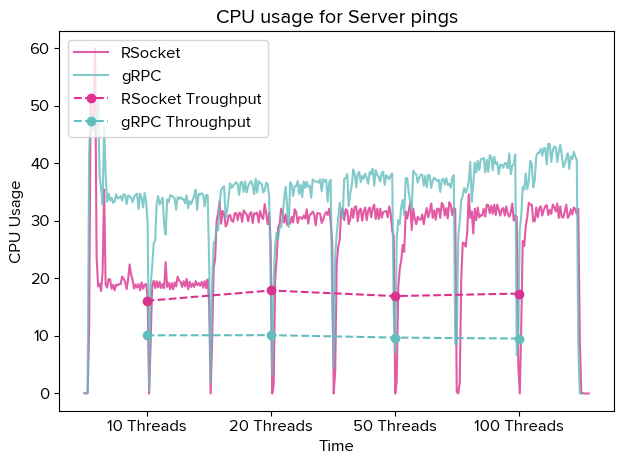

In [399]:
draw_cpu_chart(
    rsocket_req_res_cpu,
    grpc_req_res_cpu,
    grpc_throughput=grpc_req_res_throughput,
    rsocket_throughput=rsocket_req_res_throughput,
    throughput_labels=[
        "10 Threads",
        "20 Threads",
        "50 Threads",
        "100 Threads",
    ],
    title = "CPU usage for Server pings",
    save_loc="../graphs/req_res_cpu.png"
)

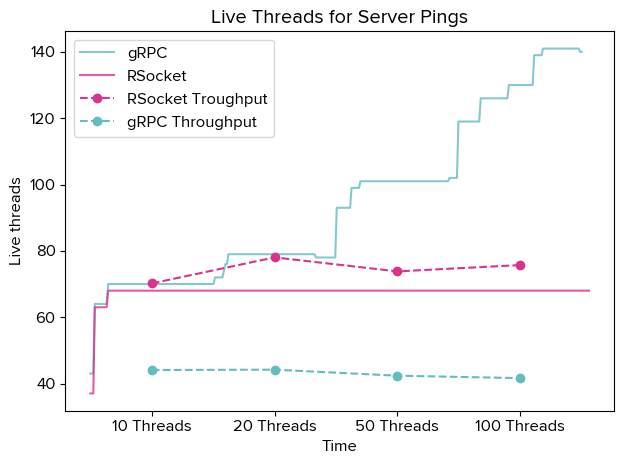

In [400]:
draw_thread_chart(
    rsocket_req_res_thread,
    grpc_req_res_thread,
    grpc_throughput=grpc_req_res_throughput,
    rsocket_throughput=rsocket_req_res_throughput,
    throughput_labels=[
        "10 Threads",
        "20 Threads",
        "50 Threads",
        "100 Threads",
    ],
    title="Live Threads for Server Pings",
    save_loc="../graphs/req_res_thread.png"
)

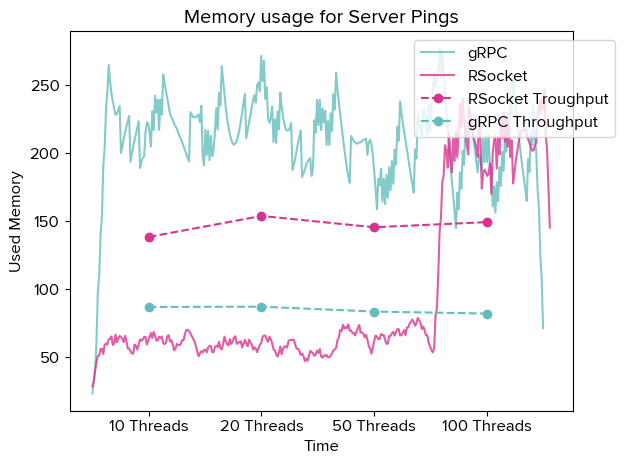

In [401]:
draw_mem_chart(
    rsocket_req_res_mem,
    grpc_req_res_mem,
    grpc_throughput=grpc_req_res_throughput,
    rsocket_throughput=rsocket_req_res_throughput,
    throughput_labels=[
        "10 Threads",
        "20 Threads",
        "50 Threads",
        "100 Threads",
    ],
    title="Memory usage for Server Pings",
    save_loc="../graphs/req_res_mem.png"
)

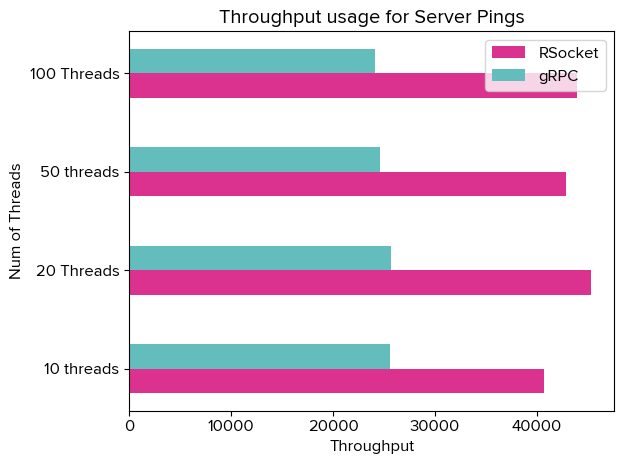

In [402]:
draw_throughput_chart(
    rsocket_req_res_throughput,
    grpc_req_res_throughput,
    [
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="Throughput usage for Server Pings",
    save_loc="../graphs/req_res_throughput.png"
)

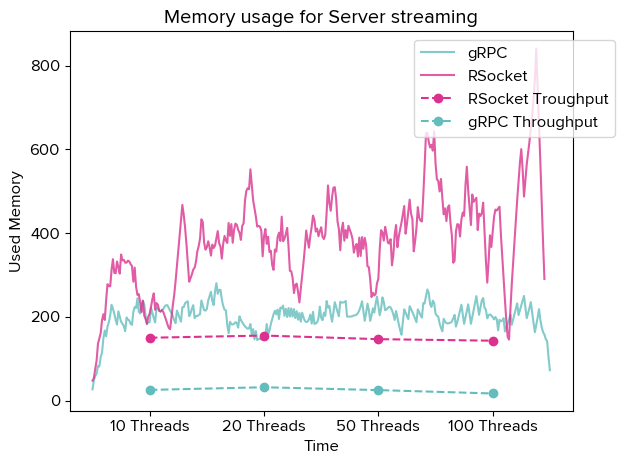

In [403]:
draw_mem_chart(
    rsocket_req_stream_mem,
    grpc_req_stream_mem,
    grpc_throughput=grpc_req_stream_throughput,
    rsocket_throughput=rsocket_req_stream_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Memory usage for Server streaming",
    save_loc="../graphs/req_stream_mem.png"
)

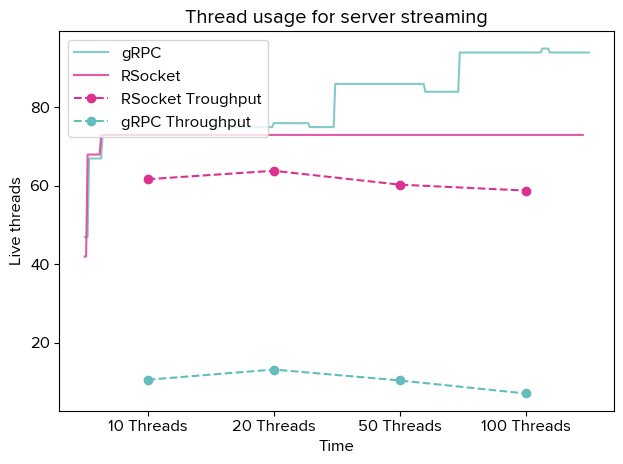

In [404]:
draw_thread_chart(
    rsocket_req_stream_thread,
    grpc_req_stream_thread,
    grpc_throughput=grpc_req_stream_throughput,
    rsocket_throughput=rsocket_req_stream_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Thread usage for server streaming",
    save_loc="../graphs/req_stream_thread.png"
)

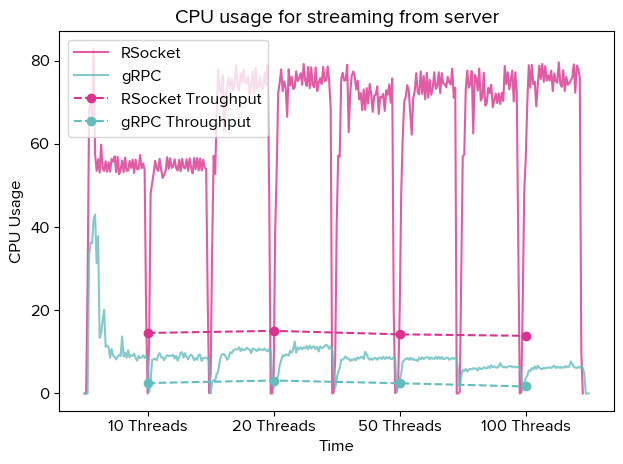

In [405]:
draw_cpu_chart(
    rsocket_req_stream_cpu,
    grpc_req_stream_cpu,
    grpc_throughput=grpc_req_stream_throughput,
    rsocket_throughput=rsocket_req_stream_throughput,
    throughput_labels=["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="CPU usage for streaming from server",
    save_loc="../graphs/req_stream_cpu.png"
)

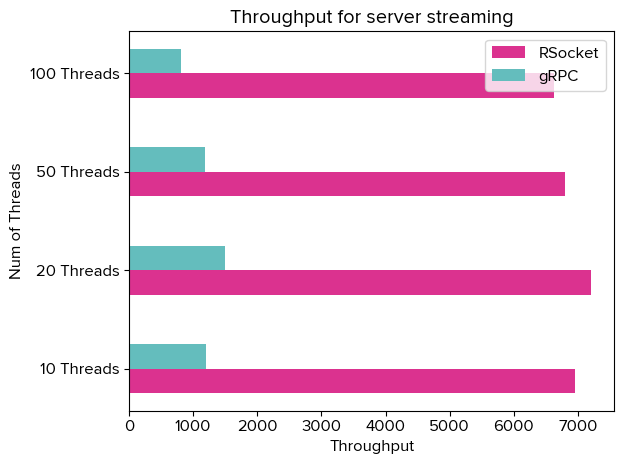

In [406]:
draw_throughput_chart(
    rsocket_req_stream_throughput,
    grpc_req_stream_throughput,
    ["10 Threads", "20 Threads", "50 Threads", "100 Threads"],
    title="Throughput for server streaming",
    save_loc="../graphs/req_stream_throughput.png"
)

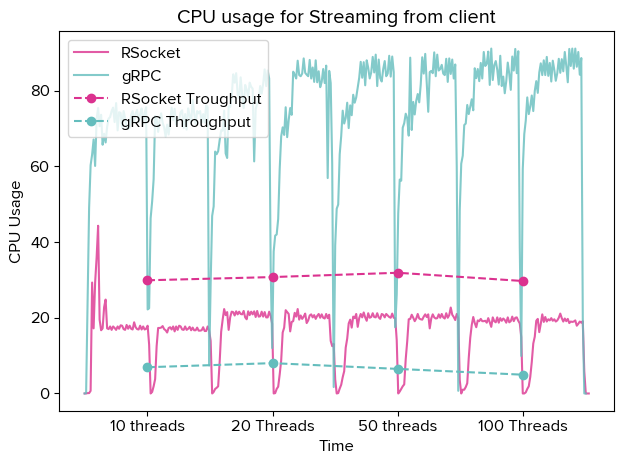

In [407]:
draw_cpu_chart(
    rsocket_stream_res_cpu,
    grpc_stream_res_cpu,
    rsocket_stream_res_throughput,
    grpc_stream_res_throughput,
    [
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="CPU usage for Streaming from client",
    save_loc="../graphs/stream_res_cpu.png"
)

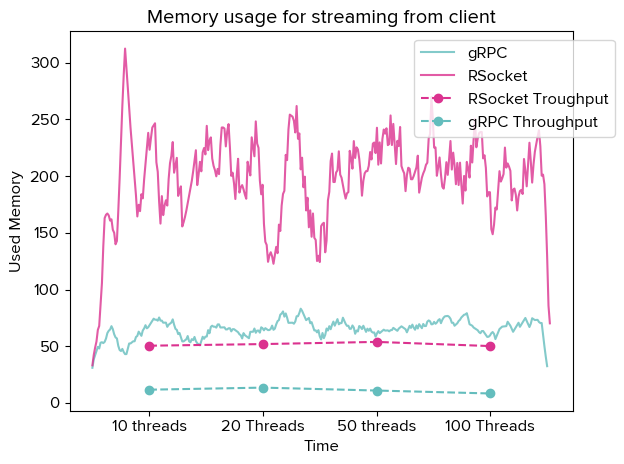

In [408]:
draw_mem_chart(
    rsocket_stream_res_mem,
    grpc_stream_res_mem,
    rsocket_throughput= rsocket_stream_res_throughput,
    grpc_throughput= grpc_stream_res_throughput,
    throughput_labels=[
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="Memory usage for streaming from client",
    save_loc="../graphs/stream_res_mem.png"
)

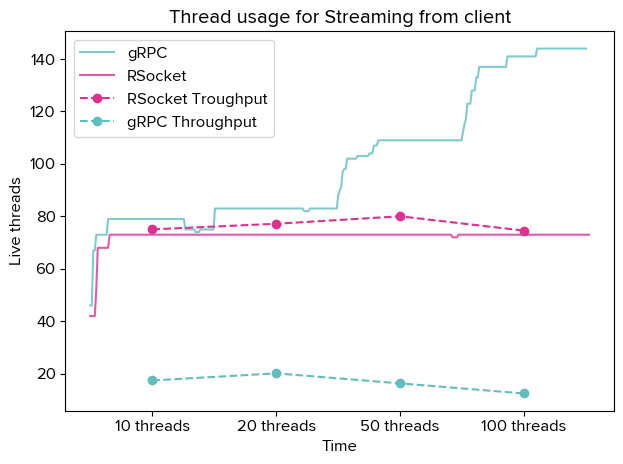

In [409]:
draw_thread_chart(
    rsocket_stream_res_thread,
    grpc_stream_res_thread,
    rsocket_stream_res_throughput,
    grpc_stream_res_throughput,
    [
        "10 threads",
        "20 threads",
        "50 threads",
        "100 threads",
    ],
    title="Thread usage for Streaming from client",
    save_loc="../graphs/stream_res_thread.png"
)

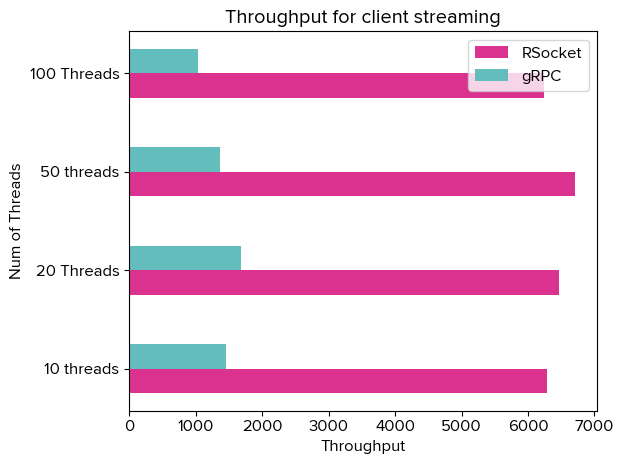

In [410]:
draw_throughput_chart(
    rsocket_stream_res_throughput,
    grpc_stream_res_throughput,
    [
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="Throughput for client streaming",
    save_loc="../graphs/stream_res_throughput.png"
)

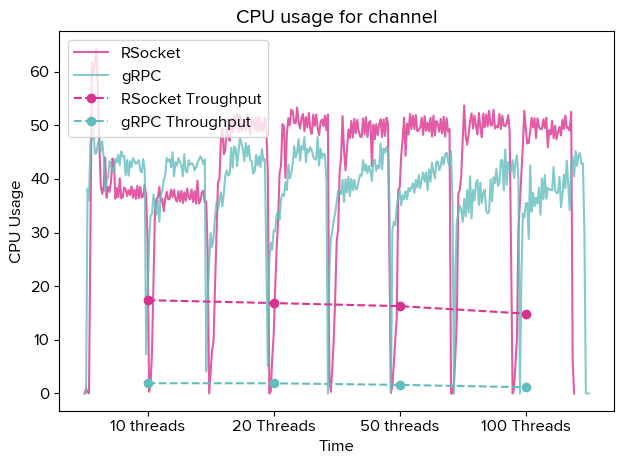

In [411]:
draw_cpu_chart(
    rsocket_channel_cpu,
    grpc_channel_cpu,
    rsocket_channel_throughput,
    grpc_channel_throughput,
    [
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="CPU usage for channel",
    save_loc="../graphs/channel_cpu.png"
)

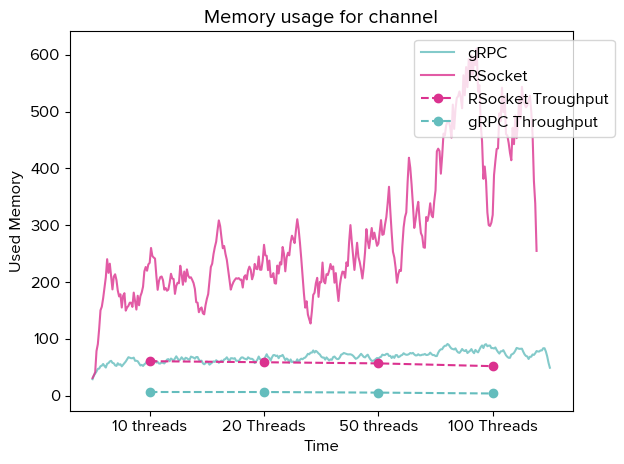

In [412]:
draw_mem_chart(
    rsocket_channel_mem,
    grpc_channel_mem,
    rsocket_throughput= rsocket_channel_throughput,
    grpc_throughput= grpc_channel_throughput,
    throughput_labels=[
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="Memory usage for channel",
    save_loc="../graphs/channel_mem.png"
)

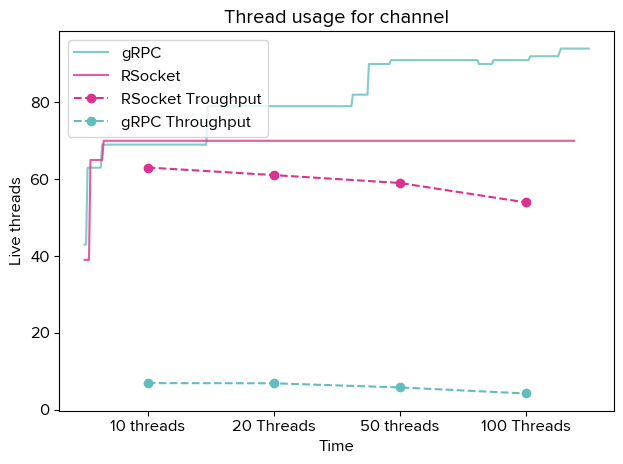

In [413]:
draw_thread_chart(
    rsocket_channel_thread,
    grpc_channel_thread,
    rsocket_throughput= rsocket_channel_throughput,
    grpc_throughput= grpc_channel_throughput,
    throughput_labels=[
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="Thread usage for channel",
    save_loc="../graphs/channel_thread.png"
)

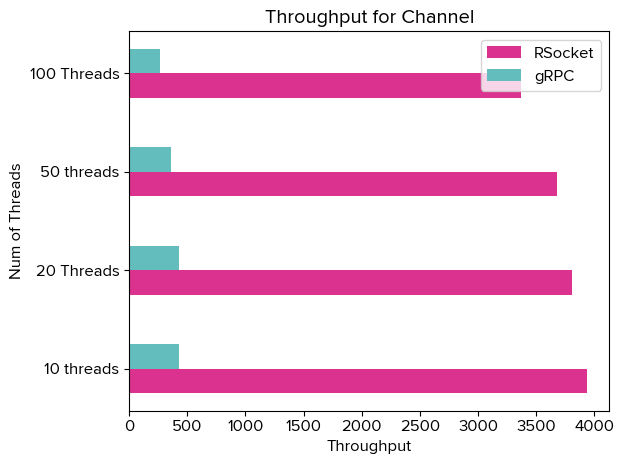

In [414]:
draw_throughput_chart(
    rsocket_channel_throughput,
    grpc_channel_throughput,
    [
        "10 threads",
        "20 Threads",
        "50 threads",
        "100 Threads",
    ],
    title="Throughput for Channel",
    save_loc="../graphs/channel_throughput.png"
)